In [5]:
pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.2 MB/s 
     |████████████████████████████████| 965 kB 59.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test = pd.read_csv("Test.csv")
results = pd.read_csv("results.csv")

In [8]:
def perce_res():
  good = 0
  bad = 0
  for i in range(results.shape[0]):
    value = results.iloc[i]
    x = np.argmax([value["Probability_of_Rock"], value["Probability_of_Metal"]])
    if value["Real"] == 1:
      if x == 1:
        good = good + 1
      else:
        bad = bad + 1
    else:
      if x == 0:
        good = good + 1
      else:
        bad = bad + 1
  print("Percentage of rigth", good/results.shape[0])

def values_res():
  dif_per = []
  maxs_loss = []
  for i in range(results.shape[0]):
    value = results.iloc[i]
    if value["Real"] == 1:
      dif_per.append(1 - value["Probability_of_Metal"])
      if 1 - value["Probability_of_Metal"] >= 0.8:
        maxs_loss.append(value[0])
    else:
      dif_per.append(1 - value["Probability_of_Rock"])
      if 1 - value["Probability_of_Rock"] >= 0.8:
          maxs_loss.append(value[0])
  
  plt.figure(figsize=(10, 10))
  values, bins, bars = plt.hist(dif_per, edgecolor='white')
  plt.xlabel("Percentage Error")
  plt.ylabel("Number of Occurrences")
  plt.bar_label(bars, fontsize=20, color='navy')
  return maxs_loss

Percentage of rigth 0.8253968253968254


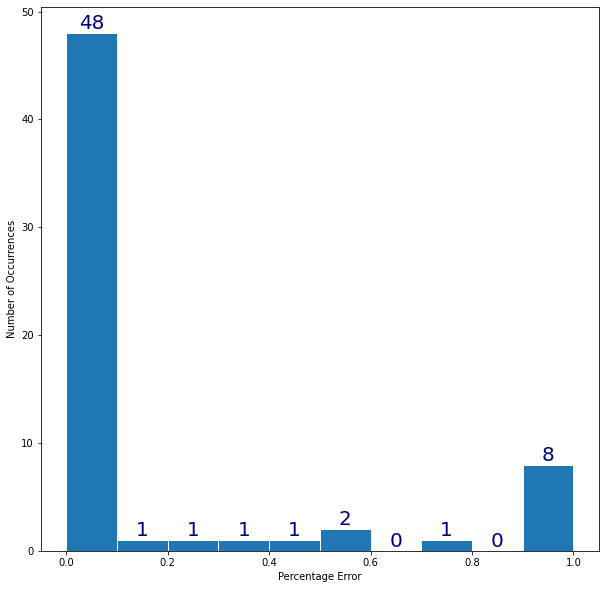

In [9]:
a = values_res()
perce_res()

All of the following graphs are labeled wrong. If it says that is a R it should have been labeled as a M
Graphic of 21 is a M has been labeled as the opposite


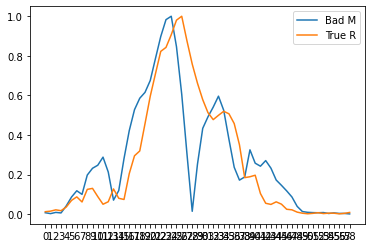

Graphic of 27 is a M has been labeled as the opposite


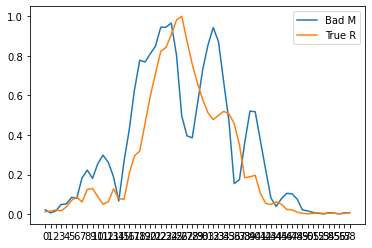

Graphic of 31 is a R has been labeled as the opposite


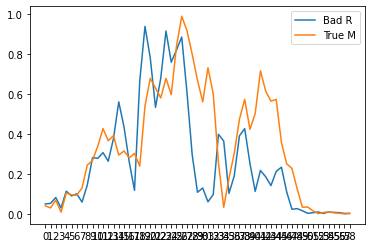

Graphic of 33 is a M has been labeled as the opposite


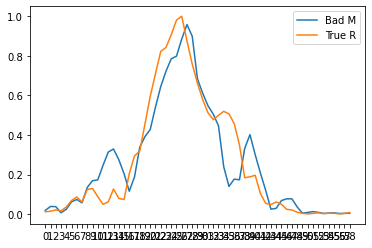

Graphic of 36 is a R has been labeled as the opposite


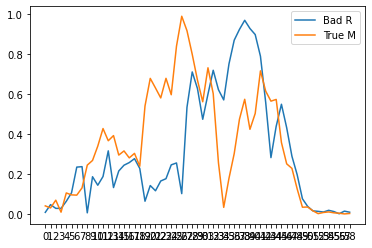

Graphic of 38 is a R has been labeled as the opposite


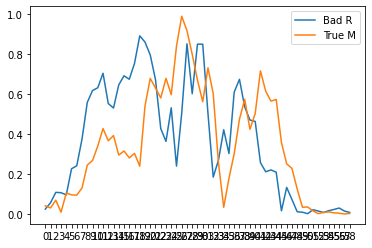

Graphic of 47 is a R has been labeled as the opposite


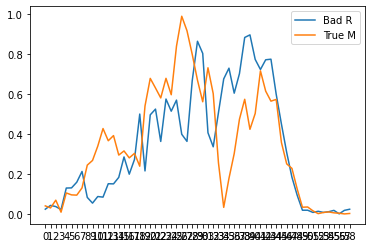

Graphic of 50 is a R has been labeled as the opposite


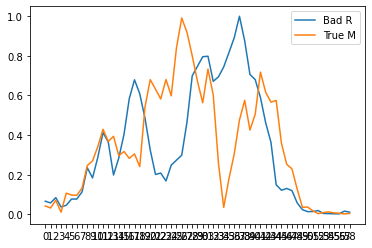

In [18]:
print("All of the following graphs are labeled wrong. If it says that is a R it should have been labeled as a M")
real_r = test.iloc[3][1:-2]
real_m = test.iloc[6][1:-2]
for i in a:
  value = test.iloc[int(i)]
  print("Graphic of", int(i), "is a", value[-1], "has been labeled as the opposite")
  plt.plot(value[1:-2])
  if value[-1] == "R":
    plt.plot(real_m)
    plt.legend(["Bad R", "True M"])
  else:
    plt.plot(real_r)
    plt.legend(["Bad M", "True R"])
  plt.show()

So, what we have here are graphs wich content is split between what the neural network has predict(Bad M/R) and a real M/R data that the neural network has predict right. So we can compare the data of the wrong output with a real output, so we can check how different are both.    
As we can see in the majority, the data of the wrong labeled output by the neural network are quit similar to the opposite. This means that it is "normal" that the neural network mess this.